## Bar Charts

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [37]:
pokemon = pd.read_csv("pokemon.csv")
print(pokemon.shape)
pokemon.head(10)

(807, 14)


,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65
5,6,charizard,1,1.7,90.5,240,fire,flying,78,84,78,100,109,85
6,7,squirtle,1,0.5,9.0,63,water,NaN,44,48,65,43,50,64
7,8,wartortle,1,1.0,22.5,142,water,NaN,59,63,80,58,65,80
8,9,blastoise,1,1.6,85.5,239,water,NaN,79,83,100,78,85,105
9,10,caterpie,1,0.3,2.9,39,bug,NaN,45,30,35,45,20,20


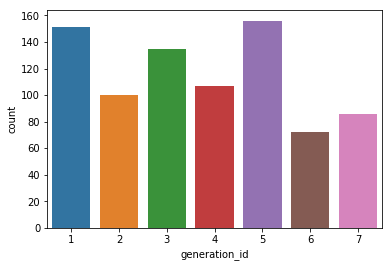

In [39]:
sb.countplot(data=pokemon,x="generation_id")

### 选择一种颜色

it's a good idea to simplify the plot and reduce unnecessary distractions by plotting all bars in the same color. This can be set using the "color" parameter:


In [40]:
# 选择一种颜色
base_color = sb.color_palette()[0]

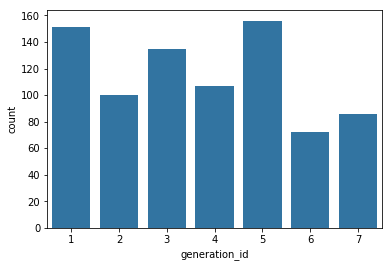

In [42]:
sb.countplot(data=pokemon,x="generation_id",color=base_color)

### 排序

In [43]:
# 排序
gen_order = pokemon["generation_id"].value_counts().index
print(gen_order)

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')


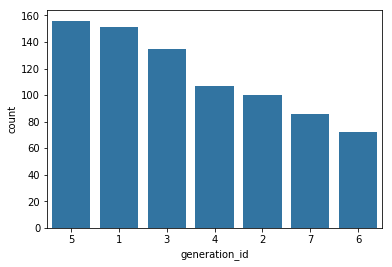

In [44]:
sb.countplot(data=pokemon,x="generation_id",color=base_color,order=gen_order)

> 选择Type 1作研究对象

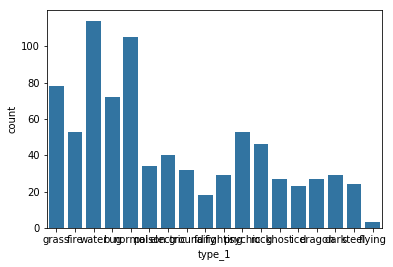

In [45]:
sb.countplot(data=pokemon,x="type_1",color=base_color)


### 转化名称方向

x-轴太紧密。根本看不清楚

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

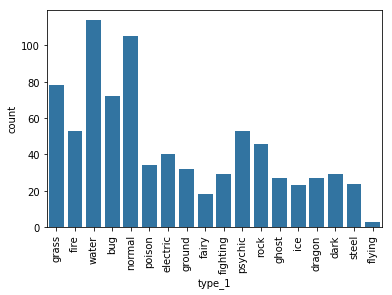

In [47]:
sb.countplot(data=pokemon,x="type_1",color=base_color)
plt.xticks(rotation=90)

### 转化y轴

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

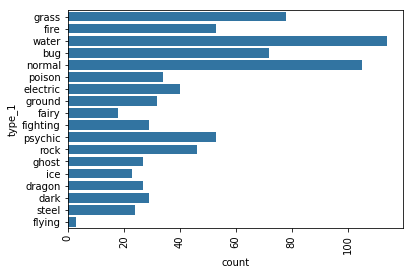

In [48]:
# 换成y轴
sb.countplot(data=pokemon,y="type_1",color=base_color)
plt.xticks(rotation=90)

### 排序

Index(['water', 'normal', 'grass', 'bug', 'psychic', 'fire', 'rock',
       'electric', 'poison', 'ground', 'dark', 'fighting', 'ghost', 'dragon',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')


(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text xticklabel objects>)

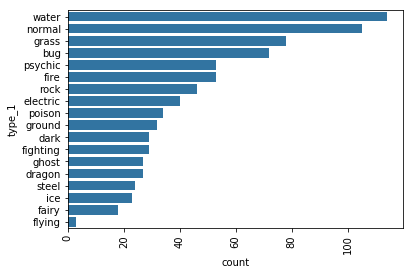

In [49]:
#排序
type_order = pokemon["type_1"].value_counts().index
print(type_order)
sb.countplot(data=pokemon,y="type_1",color=base_color,order=type_order)
plt.xticks(rotation=90)


## Absolute vs. Relative Frequency

用百分比来显示
By default, seaborn's countplot function will summarize and plot the data in terms of absolute frequency, or pure counts. In certain cases, you might want to understand the distribution of data or want to compare levels in terms of proportions of the whole. In this case, you will want to plot the data in terms of relative frequency, where the height indicates the proportion of data taking each level, rather than the absolute count.

[Pandas 的melt的使用](https://blog.csdn.net/maymay_/article/details/80039677)

In [58]:
pkmn_types = pokemon.melt(id_vars=['id','species'],value_vars = ['type_1','type_2'],
                         var_name='type_level',value_name='type').dropna()
pkmn_types[802:812]

,id,species,type_level,type
802,803,poipole,type_1,poison
803,804,naganadel,type_1,poison
804,805,stakataka,type_1,rock
805,806,blacephalon,type_1,fire
806,807,zeraora,type_1,electric
807,1,bulbasaur,type_2,poison
808,2,ivysaur,type_2,poison
809,3,venusaur,type_2,poison
812,6,charizard,type_2,flying
818,12,butterfree,type_2,flying


In [72]:
type_counts = pkmn_types['type'].value_counts()
type_orders = type_counts.index
print(type_orders)
print(type_counts)
np.sum(type_counts)

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'fairy', 'steel',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64


1212

In [63]:
base_color = sb.color_palette()[0]
print(base_color)

(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)


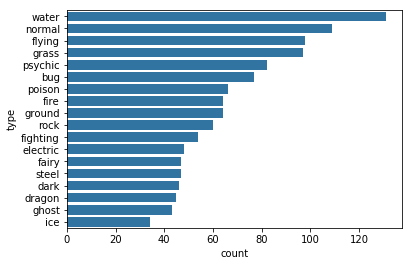

In [66]:
sb.countplot(data=pkmn_types,y='type',color=base_color,order=type_orders)

采用相对的百分比显示

创建刻度位置列表

In [71]:
n_pokemon = pkmn_types.shape[0]
# 1212
n_pokemon

1212

In [70]:
max_type_count = type_counts[0]
max_type_count
# 131

131

In [73]:
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

根据最大的值，生成刻度坐标


In [78]:
tick_props = np.arange(0,max_prop,0.02)
tick_props

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

转换成字符串形式的标签

In [93]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

The **xticks** and **yticks** functions aren't only about rotating the tick labels. You can also get and set their locations and labels as well. The first argument takes the tick locations: in this case, the tick proportions multiplied back to be on the scale of counts. The second argument takes the tick names: in this case, the tick proportions formatted as strings to two decimal places.

Text(0.5,0,'proportion')

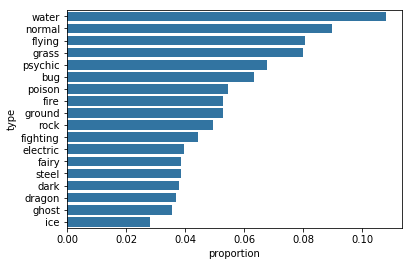

In [97]:
sb.countplot(data=pkmn_types,y='type',color=base_color,order=type_orders)

plt.xticks(tick_props*n_pokemon,tick_names)
plt.xlabel('proportion')

在柱形上显示百分比

In [84]:
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [98]:
type_counts.shape[0]

18

Rather than plotting the data on a relative frequency scale, you might use text annotations to label the frequencies on bars instead. This requires writing a loop over the tick locations and labels and adding one text element for each bar.


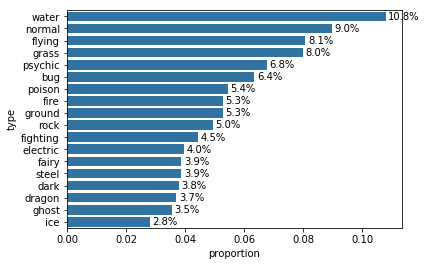

In [92]:
sb.countplot(data=pkmn_types,y='type',color=base_color,order=type_orders)
plt.xticks(tick_props*n_pokemon,tick_names)
plt.xlabel('proportion')

for i in range( type_counts.shape[0] ):
    count = type_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / n_pokemon)
    # 向右移一位，i对应的是water->ice,文本信息，对准柱形中心
    plt.text(count+1,i,pct_string,va='center')
    